In [15]:
import pandas as pd
import numpy as np
import torch.nn.functional as F
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt

import torch
import os
import pandas as pd
import numpy as np
import json,pickle
from collections import OrderedDict
from rdkit import Chem
from rdkit.Chem import MolFromSmiles
import networkx as nx

from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import Data_Prep.Graph_Data as gd
from Data_Prep.Graph_Data import Molecule_data
from math import sqrt
from utils import MyOwnDataset
from models.attenFP_v1 import AttentionConvNet
import optuna
from optuna.trial import TrialState
# from optuna_v1.attenFP_v1 import AttentionConvNet

In [3]:
# df = pd.read_csv('Data_Prep/testsetnovel.csv')

In [4]:
# smiles = df['SMILES']
# # codIds = df['CODID']
# solubility = df['logS']

In [5]:
# solubility = solubility.to_numpy()

In [3]:
import os.path as osp
path = '../data'
#osp.join(osp.dirname(osp.realpath(__file__)), '..', 'data', 'AFP_Mol')
dataset = MyOwnDataset(path, 'testset_novel.csv').shuffle()
# dataset = CustomDataset(path, 'solubility','solubility',5,6).shuffle()
# print(dataset[0])
# dataset = MoleculeNet(path, name='ESOL', pre_transform=GenFeatures()).shuffle()
# dataset = MoleculeNet(path, name='FreeSolv', pre_transform=GenFeatures()).shuffle()

# N = len(dataset) // 10
# test_dataset = dataset[:N]
# # val_dataset = dataset[N:2 * N]
# train_dataset = dataset[N:]

# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# # val_loader = DataLoader(val_dataset, batch_size=200, shuffle=True)
test_loader = DataLoader(dataset, batch_size=64, shuffle=False)

files name:  ['solubility.csv']


In [9]:
@torch.no_grad()
def test(loader, model):
    # mse = []
    model.eval()
    total_loss = total_examples = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        # out = model(data)
        # mse.append(F.mse_loss(out, data.y, reduction='none').cpu())
        # return float(torch.cat(mse, dim=0).mean().sqrt())
        y = data.y.view([-1])
        out1 = out.view([-1])
        # print("test : ", y.shape)
        test_loss = F.mse_loss(out1, y)
        # print("no of graphs: ", data.num_graphs)
        total_loss += float(test_loss) * data.num_graphs
        total_examples += data.num_graphs
        # mse.append(test_loss).cpu()
    # return test_loss,float(torch.cat(mse, dim=0).mean().sqrt())
    return total_loss,sqrt(total_loss / total_examples)

In [10]:
if torch.cuda.is_available():  
    device = "cuda:7"
    print("cuda:7")
else:  
    device = "cpu" 
    print(torch.cuda.is_available())

cuda:7


In [11]:
# Generate the model.
model = AttentionConvNet().to(device)
# model = define_model(trial).to(device)
#optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
# optimizer = torch.optim.Adam(model.parameters(), lr=.0023467,
#                              weight_decay=.00095)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0021931604377098835,
#                               weight_decay=1.2733069489371785e-05)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0021931604377098835,
                               weight_decay=1.2733069489371785e-05)
the_last_loss = 100
patience = 30
trigger_times = 0
count_loss_difference = 0
#LR = 0.005
LR = 9.797464088146652e-05
#LR = 0.0028894537419258915
LOG_INTERVAL = 20
NUM_EPOCHS = 200
results = []

In [12]:
# class RMSELoss(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.mse = nn.MSELoss()
        
#     def forward(self,yhat,y):
#         return torch.sqrt(self.mse(yhat,y))

In [13]:
# loss_fn = nn.L1Loss()

In [14]:
best_ret = []
best_mse = 0.80
best_ci = 0
best_epoch = -1

In [12]:
folds = 10
results = []
best_rmse_arr = []

for fold in tqdm(range(folds)):
    val_losses = []
    train_losses = []
    mae_arr = []
    patience = 30
    trigger_times = 0
    the_last_loss = 100
    
    model_file_name = 'saved_models/model_' +  str(fold) +  '.model'
    result_file_name = 'result_' + str(fold) +  '.csv'
    
#     train_data = Molecule_data(root='data', dataset='train_data_set_fold_'+str(fold),y=None,smile_graph=None,smiles=None)
#     test_data = Molecule_data(root='data', dataset='test_data_set_fold_'+str(fold),y=None,smile_graph=None,smiles=None)
    
#     TRAIN_BATCH_SIZE = 40
    checkpoint = torch.load(model_file_name, map_location=torch.device(device))
    model.load_state_dict(checkpoint)
#     model.load_state_dict(torch.load(model_file_name))
    
#     test_loss,test_rmse = test(test_loader, model)
    print(test_rmse)
#     train_loader   = DataLoader(train_data,batch_size=TRAIN_BATCH_SIZE,shuffle=True)
#     test_loader  = DataLoader(test_data,batch_size=TRAIN_BATCH_SIZE,shuffle=True)
#     model = AttentiveFP(in_channels=112, hidden_channels=279, out_channels=1,
#                     num_layers=3, num_timesteps=2,
#                     dropout=0.047352327938708194).to(device)
    best_ret = []
    
#     model = model.cuda(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=LR)
#     best_mae = 0.00
    
#     for epoch in range(NUM_EPOCHS):
#         train_loss,train_rmse=train(model, optimizer,train_loader)
#         test_loss,test_rmse = test(test_loader, model)
        
#         print(f'Epoch: {epoch:03d}, Loss: {train_rmse:.4f} '
#           f'Test: {test_rmse:.4f}')
        
#         ret = [epoch,train_rmse,test_rmse]
        
#         train_losses.append(train_rmse)
#         val_losses.append(test_rmse)
#         # Early Stopping
#         the_current_loss = test_rmse   #.item()
#         best_ret.append(ret)
#         if the_current_loss > the_last_loss:
#             trigger_times += 1
#             print('trigger times:', trigger_times)
    
#             if trigger_times >= patience:
#                 print('Early stopping!\nStart to test process.')
#                 break
#         else:
#             ret = [epoch,train_rmse,test_rmse]
#             trigger_times = 0
#             the_last_loss = the_current_loss
#             best_rmse = the_current_loss
            
#             torch.save(model.state_dict(), model_file_name)
        # Early stopping
#         the_current_loss = test_loss.item()
        
#         best_ret.append(ret)
        
#         if the_current_loss > the_last_loss:
#             trigger_times += 1
#             print('trigger times:', trigger_times)
            
#             if trigger_times >= patience:
#                 print('Early stopping!\nStart to test process.')
#                 break
#         else:
#             ret = [epoch,train_loss,test_loss.item()]
#             trigger_times = 0
#             best_mae = the_current_loss
#             the_last_loss = the_current_loss
            
#             torch.save(model.state_dict(), model_file_name)

    results.append(best_ret)
    best_rmse_arr.append(best_rmse)

  0%|          | 0/10 [00:00<?, ?it/s]

KeyError: 'conv1.atom_convs.1.lin_src.weight'

In [16]:
format_float = "{:.2f}".format(best_rmse)

In [17]:
type(format_float)

str

In [18]:
resSt = results[0][1]

In [19]:
res_val = resSt

In [20]:
res_val

[1, 1.3233232530589938, 1.2333443950066958]

75
75
33
33
31
31
47
47
36
36
33
33
35
35
47
47
32
32
32
32


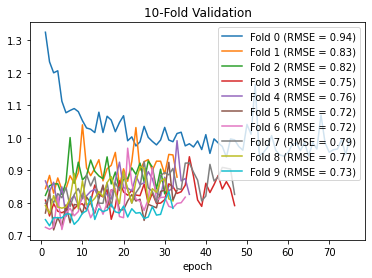

In [21]:
folds = 10
for fold in range(folds):
    train_loss_arr = []
    test_loss_arr = []
    for res in results[fold]:
        train_loss_arr.append(res[1])
        test_loss_arr.append(res[2])
        
    print(len(train_loss_arr))
    print(len(test_loss_arr))
    ax = plt.subplot(1,1,1)
    
    ax.WindowState = 'maximized';

    format_mae = "{:.2f}".format(best_rmse_arr[fold])
    
  #  ax.plot([e for e in range(1,len(train_loss_arr) + 1)], train_loss_arr, label="train_loss")
    ax.plot([e for e in range(1,len(test_loss_arr) + 1)],
            test_loss_arr, label="Fold " + str(fold) + " (RMSE = " + format_mae + ")")
    plt.xlabel("epoch")
    ax.title.set_text('10-Fold Validation')
    ax.legend()
    ax.figure.savefig('Visualization/'+str(fold)+'.png')

In [22]:
train_loss_arr

[0.7578157881050858,
 0.7516797230281369,
 0.746149960367368,
 0.7561081667647954,
 0.7569131028395912,
 0.7411785034850644,
 0.7498314055078106,
 0.7519067701773113,
 0.7526074186071945,
 0.7486520581170931,
 0.753345929046007,
 0.7361745893126092,
 0.755673567512105,
 0.7441882153159026,
 0.7401310741048762,
 0.7498876096509955,
 0.7447578174945795,
 0.7401915800945651,
 0.741766314627518,
 0.7376514060656042,
 0.748089675578448,
 0.7487756062676426,
 0.7565133166362932,
 0.7390220007069054,
 0.7417128418665445,
 0.7203225892279077,
 0.7361790554857874,
 0.7569838461624412,
 0.7290011313560918,
 0.7485018439233192,
 0.7324669068166597,
 0.7342227268046944]